In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
dataset = pd.read_csv('SouthGermanCredit.asc', delimiter=' ')

### EDA

In [5]:
dataset.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [6]:
data = dataset.iloc[:,:-1]
kredit = dataset.iloc[:,-1]

In [7]:
data.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1


In [8]:
kredit.value_counts()

kredit
1    700
0    300
Name: count, dtype: int64

In [9]:
data.apply(pd.Series.nunique, axis = 0)

laufkont      4
laufzeit     33
moral         5
verw         10
hoehe       923
sparkont      5
beszeit       5
rate          4
famges        4
buerge        3
wohnzeit      4
verm          4
alter        53
weitkred      3
wohn          3
bishkred      4
beruf         4
pers          2
telef         2
gastarb       2
dtype: int64

In [10]:
data.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


### Evaluating number of clusters

In [12]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, Birch
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from clustergram import Clustergram

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.106 seconds.
K=3 fitted in 0.118 seconds.
K=4 fitted in 0.071 seconds.
K=5 fitted in 0.073 seconds.
K=6 fitted in 0.114 seconds.
K=7 fitted in 0.100 seconds.
K=8 fitted in 0.079 seconds.
K=9 fitted in 0.107 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

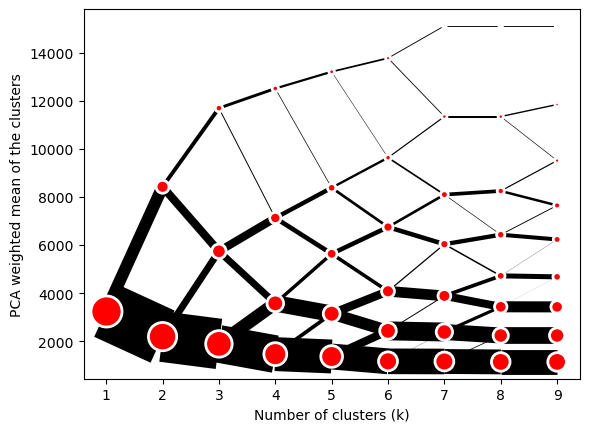

In [13]:
#definining number of cluster. not very informative. maybe 2 clusters is only reasonable option
cgram = Clustergram(range(1, 10))
cgram.fit(data)
cgram.plot()

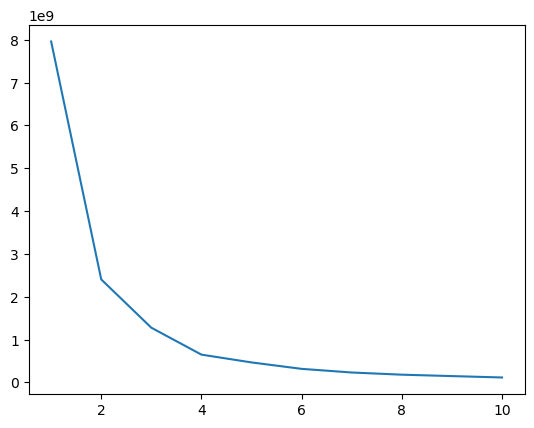

In [14]:
# elbow method to determine number of cluster. 2 clusters is optimal
WCSS=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data)
  WCSS.append(kmeans.inertia_)
WCSS

plt.plot(range(1,11),WCSS)

In [15]:
#elbow method with scaled data

In [16]:
#scaling
scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data)

data_scaled = data/data.std()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.100 seconds.
K=3 fitted in 0.115 seconds.
K=4 fitted in 0.101 seconds.
K=5 fitted in 0.100 seconds.
K=6 fitted in 0.150 seconds.
K=7 fitted in 0.191 seconds.
K=8 fitted in 0.171 seconds.
K=9 fitted in 0.197 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

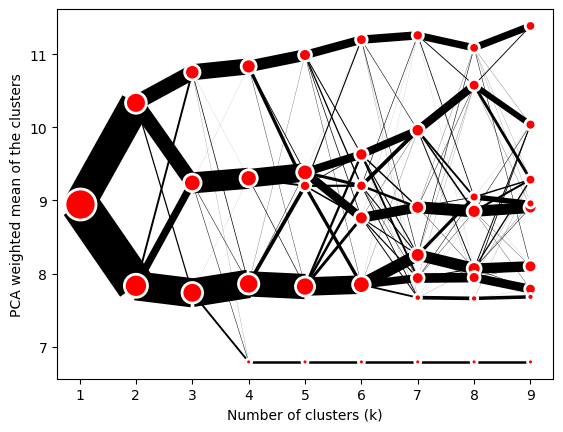

In [17]:
#clustergram with scaled data
cgram = Clustergram(range(1, 10))
cgram.fit(data_scaled)
cgram.plot()

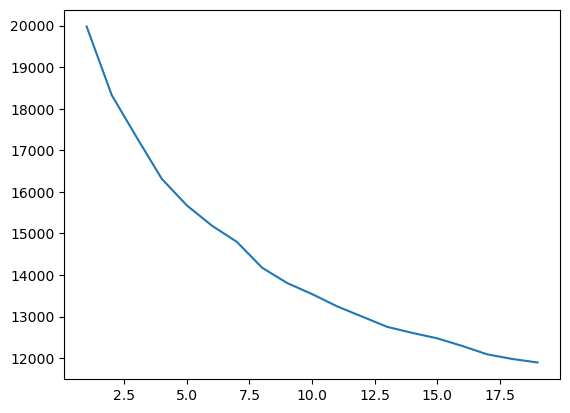

In [18]:
#elbow method with scaled data
WCSS = []
for i in range(1,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data_scaled)
  WCSS.append(kmeans.inertia_)
WCSS

plt.plot(range(1,20),WCSS)

In [19]:
#silhouette_score k-means. with out scaling

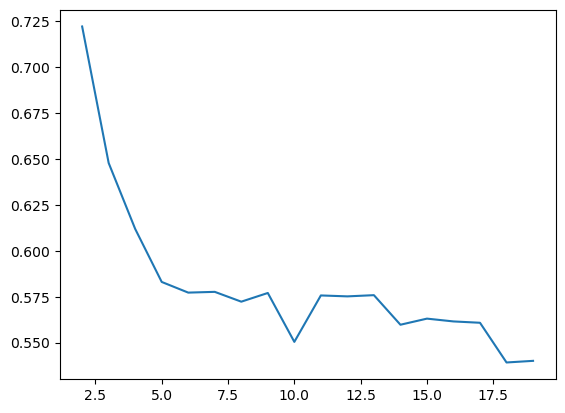

In [20]:
#silhouette_score k-means. with out scaling
ss = []
for i in range(2,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data)
  ss.append(silhouette_score(data, kmeans.labels_))

plt.plot(range(2,20),ss)

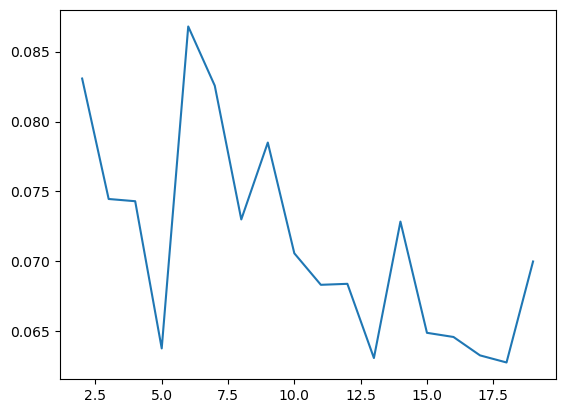

In [21]:
#silhouette_score k-means + scaling
ss = []
for i in range(2,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data_scaled)
  ss.append(silhouette_score(data_scaled, kmeans.labels_))

plt.plot(range(2,20),ss)

### Clustering

In [23]:
#check how our clustering results(not scaled data) stand with target column (not very good)
#seems like clustering is done mainly by one column with high values, other columns are ignored)
kmeans=KMeans(n_clusters=2)
kmeans.fit(data)
print(accuracy_score(kredit, 1-kmeans.labels_))
print(classification_report(kredit, 1-kmeans.labels_))
print(confusion_matrix(kredit, 1-kmeans.labels_))

0.671
              precision    recall  f1-score   support

           0       0.42      0.24      0.30       300
           1       0.72      0.86      0.78       700

    accuracy                           0.67      1000
   macro avg       0.57      0.55      0.54      1000
weighted avg       0.63      0.67      0.64      1000

[[ 72 228]
 [101 599]]


In [24]:
#DBSCAN generaly nor working good vor this dataset. with recommended parameters DBSCAN gives 1 cluster. it works with unresonable parameters, and score is low

In [25]:
clustering = DBSCAN(eps=0.3, min_samples=2).fit(data_scaled)
print(silhouette_score(data_scaled, clustering.labels_))

-0.09147676545799377


In [26]:
 #AgglomerativeClustering

In [27]:
clustering = AgglomerativeClustering(linkage='ward').fit(data_scaled)
print(silhouette_score(data_scaled, clustering.labels_))
print(accuracy_score(kredit, 1-clustering.labels_))
print(classification_report(kredit, 1-clustering.labels_))
print(confusion_matrix(kredit, 1-clustering.labels_))

0.26810101560412286
0.67
              precision    recall  f1-score   support

           0       0.08      0.01      0.02       300
           1       0.69      0.95      0.80       700

    accuracy                           0.67      1000
   macro avg       0.39      0.48      0.41      1000
weighted avg       0.51      0.67      0.57      1000

[[  3 297]
 [ 33 667]]


In [28]:
%pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [29]:
#KMODES - kmeans with categorical clustering

In [30]:
from kmodes.kprototypes import KPrototypes

In [31]:
#divide categorical and numeric columns
numeric = ['laufzeit', 'hoehe', 'alter']
data_num = data[numeric]
data_cat = data.drop(columns=numeric)
categorical = data_cat.columns
cat_index = [data.columns.get_loc(col) for col in categorical]

In [32]:
#modeling unscaled data
k_prototypes = KPrototypes(n_clusters=2, n_init=5)
clusters = k_prototypes.fit_predict(data, categorical=cat_index)

In [33]:
# the same result as with normal kmeans
print(silhouette_score(data, clusters))
print(classification_report(kredit, 1-clusters))
print(confusion_matrix(kredit, 1-clusters))

0.7222312904192741
              precision    recall  f1-score   support

           0       0.28      0.76      0.40       300
           1       0.58      0.14      0.23       700

    accuracy                           0.33      1000
   macro avg       0.43      0.45      0.32      1000
weighted avg       0.49      0.33      0.28      1000

[[228  72]
 [599 101]]


In [34]:
#dataset with categorical + scaled numeric columns
data_num_scaled = data_scaled[numeric]
data_num_s_cat = pd.concat([data_num_scaled, data_cat], axis=1)
column_indexes = list(range(3, 20))

In [35]:
#clustering KMODES + numeric scaling
k_prototypes = KPrototypes(n_clusters=2, n_init=5, random_state=42)
clusters = k_prototypes.fit_predict(data_num_s_cat, categorical=column_indexes)

In [36]:
# slightly different results
print(silhouette_score(data_num_scaled, clusters))
print(accuracy_score(kredit, clusters))
print(classification_report(kredit, clusters))
print(confusion_matrix(kredit, clusters))

0.4148994481299882
0.675
              precision    recall  f1-score   support

           0       0.45      0.38      0.41       300
           1       0.75      0.80      0.78       700

    accuracy                           0.68      1000
   macro avg       0.60      0.59      0.59      1000
weighted avg       0.66      0.68      0.67      1000

[[113 187]
 [138 562]]


### PCA transofrmation

In [38]:
from sklearn.decomposition import PCA

In [39]:
# PCA transformation of unscaled data
pca_model = PCA(n_components=10)
pca_model.fit(data)
data_pca = pca_model.fit_transform(data)

print(pca_model.explained_variance_ratio_)
print('information ', pca_model.explained_variance_ratio_.sum())

[9.99970189e-01 1.63787047e-05 1.09773200e-05 9.25511192e-07
 3.41920585e-07 2.01780396e-07 1.90290312e-07 1.40272907e-07
 1.31663275e-07 1.25395818e-07]
information  0.9999996017715267


[0.12679607 0.09842891 0.07075016 0.06601061 0.06064316 0.05846197
 0.05691461 0.0544174  0.04907078 0.04447399]
information  0.6859676659639978


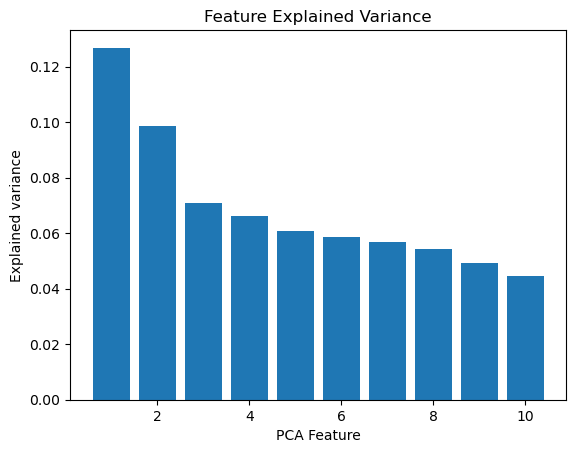

In [91]:
# PCA transofrmation of scaled data
pca_model = PCA(n_components=10)
pca_model.fit(data_scaled)
data_scaled_pca = pca_model.fit_transform(data_scaled)

print(pca_model.explained_variance_ratio_)
print('information ', pca_model.explained_variance_ratio_.sum())

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca_model.explained_variance_)+1),
    pca_model.explained_variance_ratio_
    )

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [41]:
# Kmeans clustering, scaled data + PCA
clustering = KMeans(n_clusters=2).fit(data_scaled_pca)
print(silhouette_score(data_scaled_pca, clustering.labels_))
print(accuracy_score(kredit, clustering.labels_))

0.11942016243437066
0.475


In [42]:
#PCA for numerical columns
pca_model = PCA(n_components=2)
pca_model.fit(data_num_scaled)
data_scaled_num_pca = pca_model.fit_transform(data_num_scaled)
print(pca_model.explained_variance_ratio_)
print('information loss', pca_model.explained_variance_ratio_.sum())

[0.54167027 0.33461797]
information loss 0.8762882370345274


In [43]:
#Kmeans for scaled numerical + categorical unscaled
data_num_s_cat = pd.concat([pd.DataFrame(data_scaled_num_pca), data_cat], axis=1)
column_indexes = list(range(3, 19))

k_prototypes = KPrototypes(n_clusters=2, n_init=5, random_state=42)
clusters = k_prototypes.fit_predict(data_num_s_cat, categorical=column_indexes)

print(silhouette_score(data_num_s_cat, clusters))
print(accuracy_score(kredit, clusters))
print(classification_report(kredit, clusters))
print(confusion_matrix(kredit, clusters))

0.07521519456655264
0.363
              precision    recall  f1-score   support

           0       0.13      0.20      0.16       300
           1       0.56      0.43      0.49       700

    accuracy                           0.36      1000
   macro avg       0.34      0.32      0.32      1000
weighted avg       0.43      0.36      0.39      1000

[[ 60 240]
 [397 303]]


### Kmeans with scaled 3 numerical columns

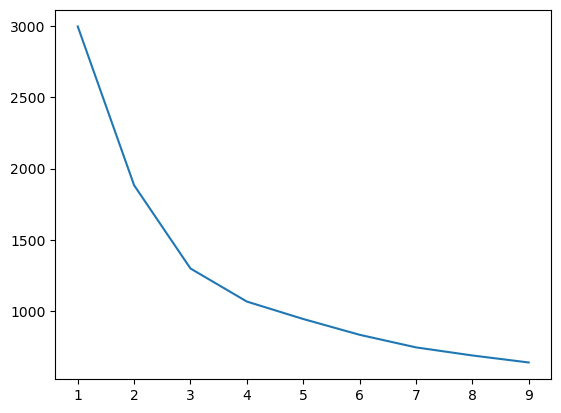

In [45]:
WCSS = []
for i in range(1,10):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data_num_scaled)
  WCSS.append(kmeans.inertia_)
WCSS

plt.plot(range(1,10),WCSS)

In [46]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(data_num_scaled)
print(silhouette_score(data_num_scaled, kmeans.labels_))

0.43481125856349856


In [47]:
# almost same result as for kmeans with 20 columns, it means that categorical columns(17 columns) have very low weight in this type of clustering
kmeans=KMeans(n_clusters=2)
kmeans.fit(data_num_scaled)
print(accuracy_score(kredit, 1-kmeans.labels_))
print(classification_report(kredit, 1-kmeans.labels_))
print(confusion_matrix(kredit, 1-kmeans.labels_))

0.674
              precision    recall  f1-score   support

           0       0.44      0.32      0.37       300
           1       0.74      0.82      0.78       700

    accuracy                           0.67      1000
   macro avg       0.59      0.57      0.58      1000
weighted avg       0.65      0.67      0.66      1000

[[ 97 203]
 [123 577]]
